## Fiona Neilson | Uploading and manipulating image colour with numpy

This code allows you to upload an image, turn it into an array and then explore the colour channels. You can look at the colour values of individual pixels, and you can separate the image into its three colour channels and recombine them.

#### 0 - Import libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

#### 1 - Get image details

I have provided several images for you to try, but you can also use your own:

*cat.jpg* - black cat

*grass.jpg* - green grass

*silky.jpg* - blue building

*snow.jpg* - white snow


In [58]:
# input image name
file_name = input("Enter the image name, including the extension: ")

# import photo
image = Image.open(file_name)
  
# summary image details
print(f"Image format: {image.format}")
print(f"Image size: {image.size}")
print(f"Image mode: {image.mode}")

Enter the image name, including the extension: silky.jpg
Image format: JPEG
Image size: (3506, 2546)
Image mode: RGB


#### 2 - Convert image to numpy array

In [59]:
# convert to numpy array
from numpy import asarray

 
# use asarray() to convert PIL images into numpy array
numpydata = asarray(image) # this takes the image used 
  
# Display class
print(type(numpydata))

# shape
rows, pixels, channels = numpydata.shape
print(f"Rows: {rows}\nPixels: {pixels}\nColour channels: {channels}")
# displays rows per image, pixels per row, and channels per pixel


<class 'numpy.ndarray'>
Rows: 2546
Pixels: 3506
Colour channels: 3


#### 3 - View array as image

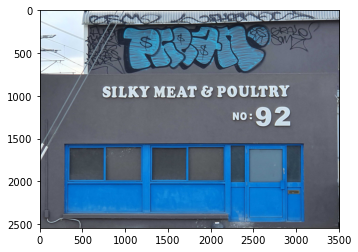

In [60]:
# view data as image
plt.imshow(numpydata)

#### 4 - Inspect pixel colours

Select a point on the above image to inspect how much of each colour is present.
Please note that the x-axis runs downwards.

In [62]:
# choose pixels

x = int(input(f"Enter the x coordinate. It must be less than {pixels}: ")) 
y = int(input(f"Enter the y coordinate. It must be less than {rows}: ")) 
print()
print("These are the colour values of the pixel at this location:")

# the amount of red in the pixel at location (x, y)
print(f"Red:   {numpydata[y, x, 0]}") #coordinates are reversed when accessing the numpy array

# the amount of green in the pixel at location (x, y)
print(f"Green: {numpydata[y, x, 1]}")

# the amount of blue in the pixel at location (x, y)
print(f"Blue:  {numpydata[y, x, 2]}")


Enter the x coordinate. It must be less than 3506: 1500
Enter the y coordinate. It must be less than 2546: 2250

These are the colour values of the pixel at this location:
Red:   1
Green: 122
Blue:  213


#### 5 - Show single colour channels

Separate the channels, then recombine using dstack.

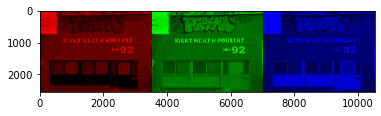

In [63]:
#create blank image channel 
blank_image_channel = np.zeros((rows, pixels, 1), dtype=np.int64)

# create new images with one colour channel each
red_channel = numpydata[:, :, 0].reshape(rows, pixels, 1)
green_channel = numpydata[:, :, 1].reshape(rows, pixels, 1)
blue_channel = numpydata[:, :, 2].reshape(rows, pixels, 1)

# combine single channel images with blank image data to get images with single primary colours
red_image = np.dstack([red_channel, blank_image_channel, blank_image_channel])
green_image = np.dstack([blank_image_channel, green_channel, blank_image_channel])
blue_image = np.dstack([blank_image_channel, blank_image_channel, blue_channel])

# display each single colour channel image, side-by-side
plt.imshow(np.hstack([red_image, green_image, blue_image]))

#### 6 - Combine colour channels

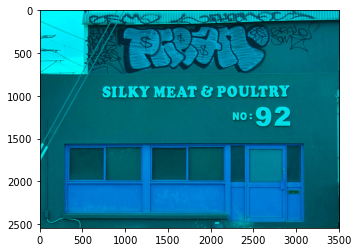

In [64]:
# green and blue
plt.imshow(np.dstack([blank_image_channel, green_channel, blue_channel]))

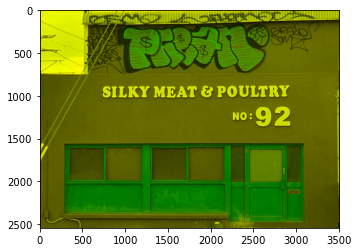

In [65]:
# red and green
plt.imshow(np.dstack([red_channel, green_channel, blank_image_channel]))

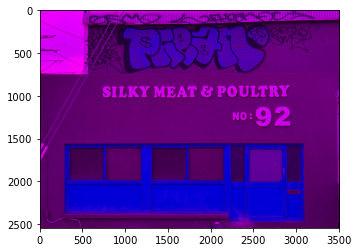

In [66]:
# red and blue
plt.imshow(np.dstack([red_channel, blank_image_channel, blue_channel]))

Credit to JCU for steps 4 - 6 (colour channel manipulation). I extended and modified the coding to enable the upload of a photo or other image and then conversion to a numpy array, as the original code provided a readymade array of several images (not these ones). I also automated capture of the row and pixel values from the array in step 2, so that they are modified every time a new image is loaded. In addition, I created the ability for a user to input pixel values of their choice so they can explore the different colour values. 

Fiona Neilson, August 2021

## End